# 0. K√ºt√ºphanelerin Eklenmesi

#### üîπ Temel Python K√ºt√ºphaneleri
- `os`: Dosya ve dizin i≈ülemleri
- `math`: Matematiksel i≈ülemler
- `random`: Rastgele sayƒ± √ºretimi

#### üîπ Veri ƒ∞≈üleme K√ºt√ºphaneleri
- `numpy`: Sayƒ±sal i≈ülemler ve array manip√ºlasyonu
- `sklearn`: Veri b√∂lme ve metrik hesaplama
- `seaborn`: ƒ∞statistiksel veri g√∂rselle≈ütirme

#### üîπ G√∂r√ºnt√º ƒ∞≈üleme
- `PIL`: Python G√∂r√ºnt√º K√ºt√ºphanesi

#### üîπ Deep Learning
- `tensorflow`: Derin √∂ƒürenme modeli olu≈üturma
- `keras`: Y√ºksek seviyeli sinir aƒüƒ± API'si
- `keras_tuner`: Hiperparametre optimizasyonu

#### üîπ G√∂rselle≈ütirme
- `matplotlib`: Veri g√∂rselle≈ütirme ve grafik olu≈üturma

In [1]:
# Temel Python k√ºt√ºphaneleri
import os
import math
import random

# Veri i≈üleme ve bilimsel hesaplama
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

# G√∂r√ºnt√º i≈üleme
from PIL import Image

# Dosya i≈ülemleri
import shutil

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Activation,
    BatchNormalization
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

# G√∂rselle≈ütirme
import matplotlib.pyplot as plt

# 1. Global Deƒüi≈ükenlerin Tanƒ±mlanmasƒ±

#### üîπ G√∂r√ºnt√º ve Veri ƒ∞≈üleme Parametreleri
- `IMAGE_SIZE`: 224 - G√∂r√ºnt√ºlerin yeniden boyutlandƒ±rƒ±lacaƒüƒ± piksel boyutu
- `BATCH_SIZE`: 32 - Her bir eƒüitim adƒ±mƒ±nda i≈ülenecek g√∂r√ºnt√º sayƒ±sƒ±
- `NUM_CLASS`: 13 - Sƒ±nƒ±flandƒ±rƒ±lacak Simpson karakteri sayƒ±sƒ±

#### üîπ Eƒüitim Parametreleri
- `EPOCHS`: 50 - Modelin eƒüitim d√∂ng√ºs√º sayƒ±sƒ±
- `TUNER_ITERATIONS`: 2 - Hiperparametre optimizasyonu i√ßin ka√ß tane 30 deneme yapƒ±lacaƒüƒ±nƒ±n sayƒ±sƒ±

#### üîπ Performans Optimizasyonu
- `AUTOTUNE`: TensorFlow'un otomatik performans optimizasyonu i√ßin kullanƒ±lan parametre

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
NUM_CLASS = 13

EPOCHS = 50
TUNER_ITERATIONS = 2

AUTOTUNE = tf.data.AUTOTUNE

# 2. Veri Seti Analizi

Simpson karakterlerinin veri setindeki daƒüƒ±lƒ±mƒ± analiz edilip pasta grafiƒüinde g√∂steriliyor. 

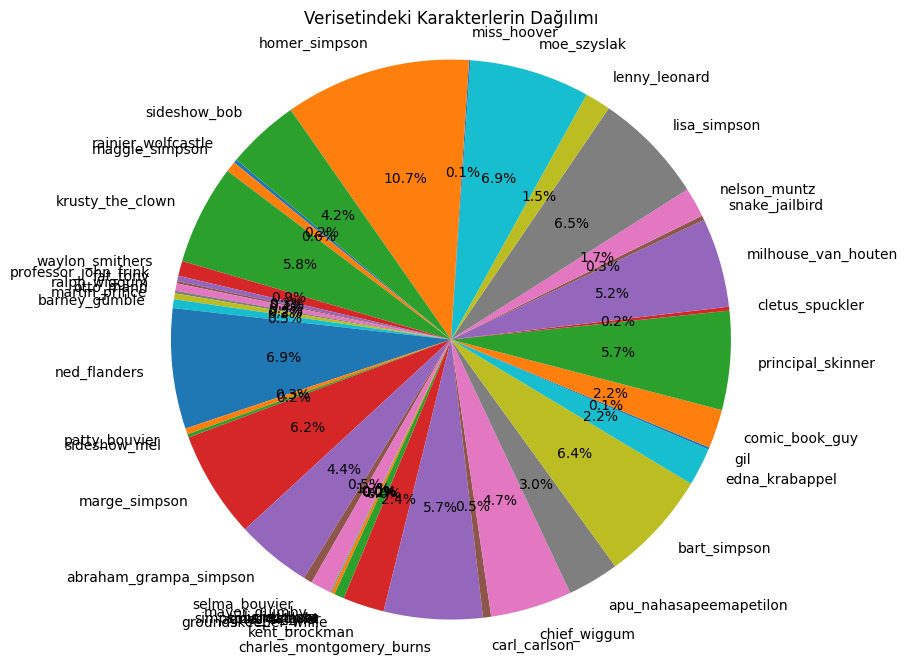

In [3]:
input_dir = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"

character_counts = {}

for character_folder in os.listdir(input_dir):
    character_folder_path = os.path.join(input_dir, character_folder)

    if os.path.isdir(character_folder_path):
        num_files = len([f for f in os.listdir(character_folder_path) if os.path.isfile(os.path.join(character_folder_path, f))])

        character_counts[character_folder] = num_files

plt.figure(figsize=(10, 8))
plt.pie(character_counts.values(), labels=character_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Verisetindeki Karakterlerin Daƒüƒ±lƒ±mƒ±')
plt.axis('equal')
plt.show()

In [4]:
sorted_counts = sorted(character_counts.items(), key=lambda x: x[1])
print("Hangi Karakterden ne kadar g√∂rsel var: (Azdan √áoƒüa Doƒüru)")
for character, count in sorted_counts:
    print(f"{character}: {count} g√∂rsel")

Hangi Karakterden ne kadar g√∂rsel var: (Azdan √áoƒüa Doƒüru)
simpsons_dataset: 0 g√∂rsel
lionel_hutz: 3 g√∂rsel
disco_stu: 8 g√∂rsel
troy_mcclure: 8 g√∂rsel
miss_hoover: 17 g√∂rsel
fat_tony: 27 g√∂rsel
gil: 27 g√∂rsel
otto_mann: 32 g√∂rsel
sideshow_mel: 40 g√∂rsel
agnes_skinner: 42 g√∂rsel
rainier_wolfcastle: 45 g√∂rsel
cletus_spuckler: 47 g√∂rsel
snake_jailbird: 55 g√∂rsel
professor_john_frink: 65 g√∂rsel
martin_prince: 71 g√∂rsel
patty_bouvier: 72 g√∂rsel
ralph_wiggum: 89 g√∂rsel
carl_carlson: 98 g√∂rsel
selma_bouvier: 103 g√∂rsel
barney_gumble: 106 g√∂rsel
groundskeeper_willie: 121 g√∂rsel
maggie_simpson: 128 g√∂rsel
waylon_smithers: 181 g√∂rsel
mayor_quimby: 246 g√∂rsel
lenny_leonard: 310 g√∂rsel
nelson_muntz: 358 g√∂rsel
edna_krabappel: 457 g√∂rsel
comic_book_guy: 469 g√∂rsel
kent_brockman: 498 g√∂rsel
apu_nahasapeemapetilon: 623 g√∂rsel
sideshow_bob: 877 g√∂rsel
abraham_grampa_simpson: 913 g√∂rsel
chief_wiggum: 986 g√∂rsel
milhouse_van_houten: 1079 g√∂rsel
charles_montgomery_bur

# 3. Veri Seti B√∂l√ºmlenmesi

Her karakter g√∂rselleri i√ßin %70 Train (Eƒüitim), %15 Validation (Doƒürulama) ve %15 Test olucak ≈üekilde b√∂l√ºmlere ayrƒ±lƒ±yor. 

#### Se√ßilen Karakterler
- Sideshow Bob
- Abraham (Grampa) Simpson
- Chief Wiggum
- Milhouse Van Houten
- Charles Montgomery Burns
- Principal Skinner
- Krusty the Clown
- Marge Simpson
- Bart Simpson
- Lisa Simpson
- Moe Szyslak
- Ned Flanders
- Homer Simpson


In [5]:
allowed_classes = [
    "sideshow_bob", "abraham_grampa_simpson", "chief_wiggum", "milhouse_van_houten",
    "charles_montgomery_burns", "principal_skinner", "krusty_the_clown", "marge_simpson",
    "bart_simpson", "lisa_simpson", "moe_szyslak", "ned_flanders", "homer_simpson"
]

input_dir = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"
output_dir = "./dataset_filtered"

os.makedirs(output_dir, exist_ok=True)
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in allowed_classes:
    class_path = os.path.join(input_dir, class_name)
    all_images = sorted(os.listdir(class_path))
    train_files, temp_files = train_test_split(all_images, train_size=0.7, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.15 / (1 - 0.7), random_state=42)

    for subset, subset_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        subset_class_dir = os.path.join(output_dir, subset, class_name)
        os.makedirs(subset_class_dir, exist_ok=True)

        for file_name in subset_files:
            src_file = os.path.join(class_path, file_name)
            dst_file = os.path.join(subset_class_dir, file_name)
            shutil.copy(src_file, dst_file)

    print(f"'{class_name}' i√ßin i≈ülem i≈ülem tamamlandƒ±.")

'sideshow_bob' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'abraham_grampa_simpson' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'chief_wiggum' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'milhouse_van_houten' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'charles_montgomery_burns' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'principal_skinner' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'krusty_the_clown' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'marge_simpson' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'bart_simpson' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'lisa_simpson' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'moe_szyslak' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'ned_flanders' i√ßin i≈ülem i≈ülem tamamlandƒ±.
'homer_simpson' i√ßin i≈ülem i≈ülem tamamlandƒ±.


# 4. Sƒ±nƒ±f Aƒüƒ±rlƒ±klarƒ±nƒ±n Hesaplanmasƒ±

G√∂rsel sayƒ±larƒ± e≈üit olmadƒ±ƒüƒ±ndan her karakter i√ßin veri setinde ne kadar g√∂rseli olduƒüuna g√∂re aƒüƒ±rlƒ±k hesaplanƒ±yor.

In [6]:
def calculate_class_weights(allowed_classes, character_counts):
    class_weights = {}
    max_samples = max(character_counts[class_name] for class_name in allowed_classes)
    
    for idx, class_name in enumerate(allowed_classes):
        weight = max_samples / character_counts[class_name]
        class_weights[idx] = weight
    
    return class_weights

class_weights = calculate_class_weights(allowed_classes, character_counts)

print("\nSƒ±nƒ±f Aƒüƒ±rlƒ±klarƒ±:")
for idx, class_name in enumerate(allowed_classes):
    print(f"{class_name}: {class_weights[idx]:.2f} (G√∂rsel sayƒ±sƒ±: {character_counts[class_name]})")


Sƒ±nƒ±f Aƒüƒ±rlƒ±klarƒ±:
sideshow_bob: 2.56 (G√∂rsel sayƒ±sƒ±: 877)
abraham_grampa_simpson: 2.46 (G√∂rsel sayƒ±sƒ±: 913)
chief_wiggum: 2.28 (G√∂rsel sayƒ±sƒ±: 986)
milhouse_van_houten: 2.08 (G√∂rsel sayƒ±sƒ±: 1079)
charles_montgomery_burns: 1.88 (G√∂rsel sayƒ±sƒ±: 1193)
principal_skinner: 1.88 (G√∂rsel sayƒ±sƒ±: 1194)
krusty_the_clown: 1.86 (G√∂rsel sayƒ±sƒ±: 1206)
marge_simpson: 1.74 (G√∂rsel sayƒ±sƒ±: 1291)
bart_simpson: 1.67 (G√∂rsel sayƒ±sƒ±: 1342)
lisa_simpson: 1.66 (G√∂rsel sayƒ±sƒ±: 1354)
moe_szyslak: 1.55 (G√∂rsel sayƒ±sƒ±: 1452)
ned_flanders: 1.54 (G√∂rsel sayƒ±sƒ±: 1454)
homer_simpson: 1.00 (G√∂rsel sayƒ±sƒ±: 2246)


# 5. Veri Setindeki Karakterlerin G√∂rselle≈ütirilmesi 

Verilen dizindeki her karakterden rastgele bir g√∂rsel se√ßip grid ≈üeklinde g√∂rselle≈ütiriliyor.


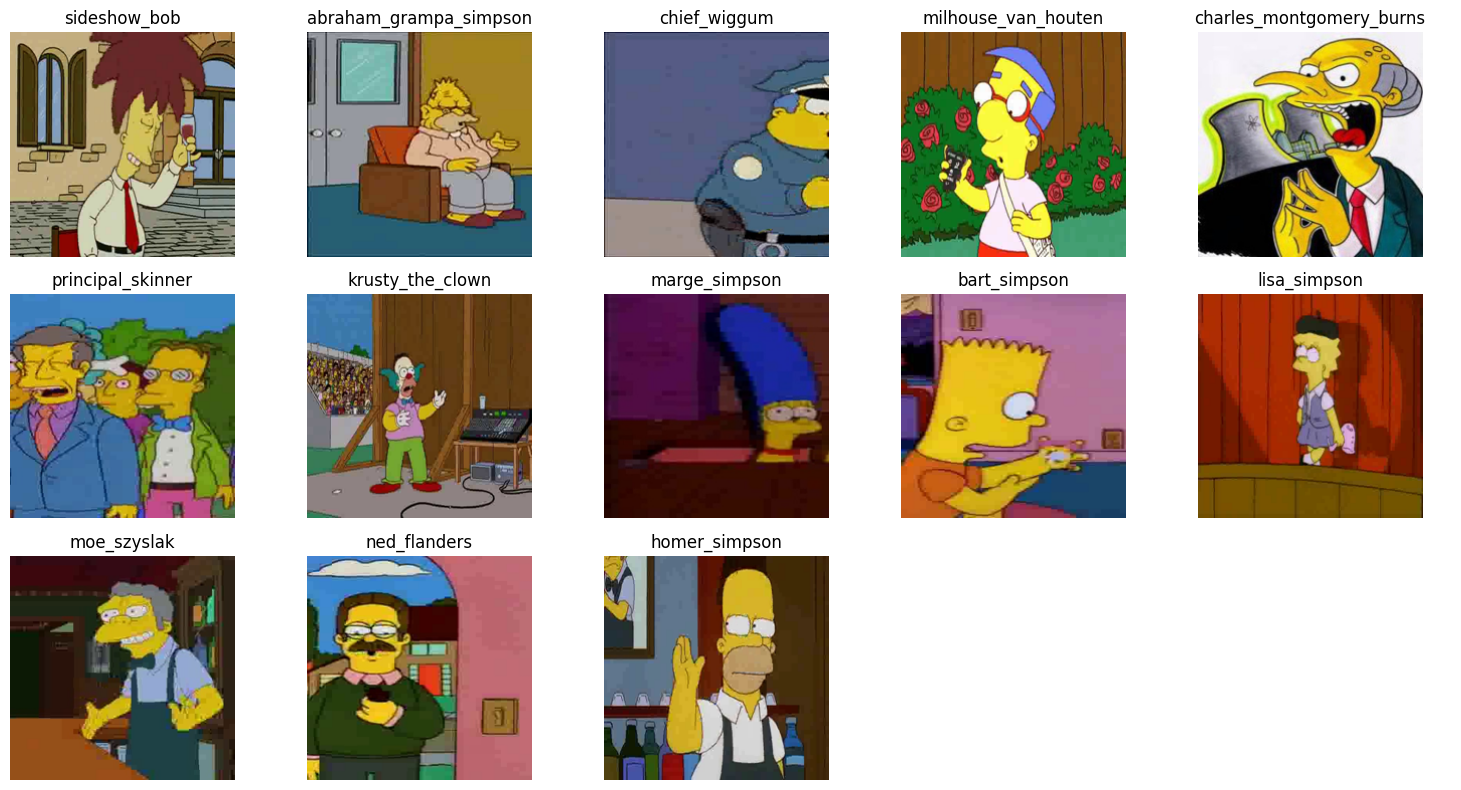

In [7]:
def visualize_random_images(output_dir, allowed_classes, img_size=(224, 224), num_cols=5, figsize=(15, 8)):
    images = []
    for character in allowed_classes:
        class_path = os.path.join(output_dir, character)
        img_files = os.listdir(class_path)
        selected_img = random.choice(img_files)
        img_path = os.path.join(class_path, selected_img)

        img = Image.open(img_path).resize(img_size)
        images.append(img)

    num_rows = math.ceil(len(allowed_classes) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, (img, label) in enumerate(zip(images, allowed_classes)):
        row, col = divmod(i, num_cols)
        axes[row, col].imshow(img)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    for i in range(len(allowed_classes), num_rows * num_cols):
        row, col = divmod(i, num_cols)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

visualize_random_images(test_dir, allowed_classes)

# 6. TensorFlow Datasetlerinin Olu≈üturulmasƒ±

#### Parametreler
- `image_size`: (224, 224) - T√ºm g√∂r√ºnt√ºler 224x224 boyuta √∂l√ßeklendirilirmesini saƒülar.
- `batch_size`: 64 - Her iterasyonda i≈ülenecek g√∂r√ºnt√º sayƒ±sƒ±nƒ± belirler.
- `seed`: 42 - Tekrar √ºretilebilirlik i√ßin sabit seed deƒüerini belirler.
- `label_mode`: "int" - Etiketler tam sayƒ± olarak kodlanmasƒ±nƒ± saƒülar.
- `labels`: "inferred" - Etiketler klas√∂r yapƒ±sƒ±ndan otomatik √ßƒ±karƒ±lmasƒ±nƒ± saƒülar.
- `color_mode`: "rgb" - G√∂r√ºnt√ºler RGB formatƒ±nda y√ºklenmesini saƒülar.

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

class_names = train_dataset.class_names

Found 11605 files belonging to 13 classes.
Found 2489 files belonging to 13 classes.
Found 2493 files belonging to 13 classes.


# 7. Veri Normalizasyonu

Piksel deƒüerlerini 0-255 aralƒ±ƒüƒ±ndan 0-1 aralƒ±ƒüƒ±na normalize ederek, modelin daha etkili √∂ƒürenmesini saƒülƒ±yoruz.

In [9]:
normalization = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization(x), y))

# 8. Veri Y√ºkleme Performans Optimizasyonu

#### Cache (√ñnbellekleme)
- `.cache()` metodu ile veriler RAM'de saklanƒ±yor
- ƒ∞lk epoch'ta veriler okunup bellekte tutuluyor
- Sonraki epoch'larda diskten tekrar okuma yapƒ±lmƒ±yor

#### Prefetch (√ñn Y√ºkleme)
- `.prefetch()` ile bir sonraki batch √∂nceden hazƒ±rlanƒ±yor
- `AUTOTUNE` parametresi ile TensorFlow otomatik optimizasyon yapƒ±yor
- GPU i≈ülem yaparken CPU bir sonraki veriyi hazƒ±rlƒ±yor

In [10]:
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 9. Model Mimarisi ve Hiperparametre Optimizasyonu

CNN modelimizin mimarisini ve hiperparametre arama uzayƒ±nƒ± tanƒ±mlanƒ±yor. Keras Tuner kullanarak en iyi model parametlerinin bulunmasƒ± saƒülanƒ±yor.

### üîπ Model Yapƒ±sƒ±

#### Giri≈ü Katmanƒ±
- G√∂r√ºnt√º boyutu: 224x224x3 (RGB)

#### Evri≈üim Bloklarƒ±
- Dinamik sayƒ±da evri≈üim katmanƒ± (1-6 arasƒ±)
- Her blokta:
  - Conv2D (filtre sayƒ±sƒ± her katmanda 2 katƒ±na √ßƒ±kar: 32, 64, 128, ...)
  - Batch Normalization
  - ReLU aktivasyonu
  - MaxPooling2D
  - Dropout (0.2)

#### √áƒ±kƒ±≈ü Katmanlarƒ±
- Global Average Pooling
- Dense katman (32-1024 arasƒ± n√∂ron)
- Batch Normalization
- Dropout (0.5)
- Softmax √ßƒ±kƒ±≈ü katmanƒ± (13 sƒ±nƒ±f)

### üîπ Optimize Edilen Hiperparametreler

#### Model Yapƒ±sƒ±
- `conv_layers`: Evri≈üim katmanƒ± sayƒ±sƒ± (1-6)
- `units`: Yoƒüun katmandaki n√∂ron sayƒ±sƒ± (32-1024)

#### Eƒüitim Parametreleri
- `learning_rate`: √ñƒürenme oranƒ± (1e-5 - 1e-3)

In [11]:
def build_model(hp):
    model = tf.keras.models.Sequential()

    # Optimize Edilen Parametreler
    hp_conv_layer_count = hp.Int("conv_layers", min_value=1, max_value=6, step=1)
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-3, 5e-4, 1e-4, 5e-5, 1e-5])
    hp_units = hp.Int("units", min_value=32, max_value=1024, step=32)

    # Giri≈ü Katmanƒ±
    model.add(tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    
    # Evri≈üim Bloklarƒ±
    for i in range(hp_conv_layer_count):
        model.add(tf.keras.layers.Conv2D(
            int(32 * (2**i)),
            (3,3),
            padding='same',
            activation=None
        ))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())
        model.add(tf.keras.layers.MaxPooling2D((2,2)))
        model.add(tf.keras.layers.Dropout(0.2))

    # √áƒ±kƒ±≈ü Katmanlarƒ±
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(
        hp_units,
        activation="relu"
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(
        NUM_CLASS,
        activation="softmax",
        name="output"
    ))

    # Modelin Derlenmesi
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
    )
    
    return model

# 10. Hyperband Tuner Konfig√ºrasyonu ve Callback'lerin Tanƒ±mlanmasƒ±

### üîπ Hyperband Ayarlarƒ±
- `build_model`: √ñnceki b√∂l√ºmde tanƒ±mlanan model olu≈üturma fonksiyonu
- `objective`: 'val_loss' (Optimizasyon hedefi)
- `max_epochs`: 10 (Her deneme i√ßin maksimum epoch sayƒ±sƒ±)
- `hyperband_iterations`: 2 (Hyperband d√∂ng√º sayƒ±sƒ±)
- `factor`: 3 (Kaynak tahsis √ßarpanƒ±)

### üîπ Callback Ayarlarƒ±

####  EarlyStopping
- `monitor='val_loss'`: Doƒürulama kaybƒ±nƒ± izler
- `patience=5`: 5 epoch boyunca iyile≈üme olmazsa eƒüitimi durdurur

#### ReduceLROnPlateau
- `monitor='val_loss'`: Doƒürulama kaybƒ±nƒ± takip eder
- `factor=0.5`: √ñƒürenme oranƒ±nƒ± yarƒ±ya indirir
- `patience=2`: 2 epoch boyunca iyile≈üme olmazsa √∂ƒürenme oranƒ±nƒ± d√º≈ü√ºr√ºr
- `min_lr=1e-6`: Minimum √∂ƒürenme oranƒ± sƒ±nƒ±rƒ±

In [12]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=TUNER_ITERATIONS,
    factor=3
)

tuner_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
]

# 11. Hiperparametre Arama S√ºrecinin Ba≈ülatƒ±lmasƒ±

### üîπ Arama Parametreleri

#### Veri Setleri
- `train_dataset`: Eƒüitim veri seti
- `validation_dataset`: Doƒürulama veri seti

#### Eƒüitim Ayarlarƒ±
- `epochs`: 10 (Her deneme i√ßin maksimum epoch sayƒ±sƒ±)
- `callbacks`: √ñnceden tanƒ±mlanan tuner_callbacks
  - Early Stopping
  - ReduceLROnPlateau
- `class_weight`: √ñnceden tanƒ±mlanan her karakterin aƒüƒ±rlƒ±ƒüƒ±

### Arama S√ºreci
1. Farklƒ± hiperparametre kombinasyonlarƒ± denenir
2. Her kombinasyon i√ßin model eƒüitilir
3. Doƒürulama performansƒ±na g√∂re deƒüerlendirme yapƒ±lƒ±r
4. En iyi performans g√∂steren konfig√ºrasyonlar belirlenir

In [13]:
tuner.search(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=tuner_callbacks,    
    class_weight=class_weights
    )

Trial 60 Complete [00h 02m 22s]
val_accuracy: 0.8099638223648071

Best val_accuracy So Far: 0.8698272109031677
Total elapsed time: 01h 05m 18s


# 12. En ƒ∞yi Hiperparametrelerin Alƒ±nmasƒ± ve Raporlanmasƒ±

Hiperparametre arama s√ºrecinde en iyi performansƒ± g√∂steren model konfig√ºrasyonunu detaylƒ± bir ≈üekilde raporlanƒ±yor.

In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Hiperparametre arama i≈ülemi tamamlandƒ±.

En iyi model parametreleri:
--------------------------------
‚Ä¢ ƒ∞lk yoƒüun katmandaki n√∂ron sayƒ±sƒ±: {best_hps.get('units')}
‚Ä¢ Optimizer √∂ƒürenme oranƒ±: {best_hps.get('learning_rate')}
‚Ä¢ Evri≈üimli katman sayƒ±sƒ±: {best_hps.get('conv_layers')}

Model mimarisi √∂zeti:
--------------------------------
‚Ä¢ Toplam evri≈üimli katman bloƒüu: {best_hps.get('conv_layers')} adet
‚Ä¢ Her blokta: Conv2D -> BatchNorm -> ReLU -> MaxPool -> Dropout
‚Ä¢ Evri≈üim filtreleri: 32, 64, 128, ... (her katmanda 2 katƒ±na √ßƒ±kar)
‚Ä¢ Son katmanda {best_hps.get('units')} n√∂ronlu yoƒüun katman
‚Ä¢ √áƒ±kƒ±≈ü katmanƒ±: {NUM_CLASS} sƒ±nƒ±f i√ßin softmax
""")


Hiperparametre arama i≈ülemi tamamlandƒ±.

En iyi model parametreleri:
--------------------------------
‚Ä¢ ƒ∞lk yoƒüun katmandaki n√∂ron sayƒ±sƒ±: 576
‚Ä¢ Optimizer √∂ƒürenme oranƒ±: 0.0005
‚Ä¢ Evri≈üimli katman sayƒ±sƒ±: 5

Model mimarisi √∂zeti:
--------------------------------
‚Ä¢ Toplam evri≈üimli katman bloƒüu: 5 adet
‚Ä¢ Her blokta: Conv2D -> BatchNorm -> ReLU -> MaxPool -> Dropout
‚Ä¢ Evri≈üim filtreleri: 32, 64, 128, ... (her katmanda 2 katƒ±na √ßƒ±kar)
‚Ä¢ Son katmanda 576 n√∂ronlu yoƒüun katman
‚Ä¢ √áƒ±kƒ±≈ü katmanƒ±: 13 sƒ±nƒ±f i√ßin softmax



# 13. En ƒ∞yi Model Yapƒ±sƒ±nƒ±n Olu≈üturulmasƒ±

Hyperband tuner'ƒ±n bulduƒüu en iyi hiperparametreler kullanƒ±larak en iyi model olu≈üturuluyor ve modelin yapƒ±sal √∂zeti g√∂r√ºnt√ºleniyor.

In [15]:
model = tuner.hypermodel.build(best_hps)

model.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_4 (Conv2D)                    ‚îÇ (None, 224, 224, 32)        ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_5                ‚îÇ (None, 224, 224, 32)        ‚îÇ             128 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ re_lu_4 (ReLU)                       ‚îÇ (None, 224, 224, 32)        ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)       ‚îÇ (None, 112, 112, 32)        ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)                  ‚îÇ (None, 112, 112, 32)        ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)                    ‚îÇ (None, 112, 112, 64)        ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_6                ‚îÇ (None, 112, 112, 64)        ‚îÇ             256 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ re_lu_5 (ReLU)                       ‚îÇ (None, 112, 112, 64)        ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_5 (MaxPooling2D)       ‚îÇ (None, 56, 56, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,877,837 (7.16 MB)

 Trainable params: 1,874,701 (7.15 MB)

 Non-trainable params: 3,136 (12.25 KB)

# 14. Eƒüitim Callback'lerinin Tanƒ±mlanmasƒ±

Callback'ler, eƒüitim s√ºrecini izler, kaydeder ve optimize eder.

### üîπ Tanƒ±mlanan Callback'ler

#### 1. Early Stopping (Erken Durdurma)
- Doƒürulama kaybƒ±nƒ± izler
- 10 epoch boyunca geli≈üme olmazsa durur
- En iyi aƒüƒ±rlƒ±klarƒ± geri y√ºkler

#### 2. ReduceLROnPlateau (√ñƒürenme Oranƒ± Azaltma)
- √ñƒürenme oranƒ±nƒ± dinamik olarak ayarlar
- Her 2 epoch'ta bir kontrol eder
- Minimum √∂ƒürenme oranƒ±: 1e-6

#### 3. ModelCheckpoint (Model Kaydetme)
- En iyi modeli otomatik olarak kaydeder
- T√ºm model yapƒ±sƒ±nƒ± saklar
- Sadece en iyi performansƒ± kayƒ±t eder

In [16]:
checkpoint_name = "Epoch{epoch:03d}-ValLoss{val_loss:.4f}-ValAcc{val_accuracy:.4f}.keras"

train_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=2, verbose=1, min_lr=1e-6
    ),
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_weights_only=False
    ),
]

# 15. Model Eƒüitiminin Ba≈ülatƒ±lmasƒ±

Model, belirlenen epoch sayƒ±sƒ± boyunca eƒüitim ve doƒürulama veri setleri √ºzerinde eƒüitilir.

### üîπ Eƒüitim Parametreleri
- **Eƒüitim Veri Seti**: `train_dataset`
- **Epoch Sayƒ±sƒ±**: 50 (EPOCHS deƒüi≈ükeninde tanƒ±mlƒ±)
- **Doƒürulama Veri Seti**: `validation_dataset`
- **Callback'ler**: √ñnceden tanƒ±mlanan `train_callbacks`

### üîπ Eƒüitim S√ºrecinde ƒ∞zlenen Metrikler
- Eƒüitim kaybƒ± (training loss)
- Eƒüitim doƒüruluƒüu (training accuracy)
- Doƒürulama kaybƒ± (validation loss)
- Doƒürulama doƒüruluƒüu (validation accuracy)

In [17]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=train_callbacks,
    class_weight=class_weights
    )

Epoch 1/50
363/363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 95ms/step - accuracy: 0.1936 - loss: 5.1617
Epoch 1: val_loss improved from inf to 2.72213, saving model to Epoch001-ValLoss2.7221-ValAcc0.1354.keras
363/363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45s 100ms/step - accuracy: 0.1938 - loss: 5.1602 - val_accuracy: 0.1354 - val_loss: 2.7221 - learning_rate: 5.0000e-04
Epoch 2/50
363/363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - accuracy: 0.4121 - loss: 3.5436
Epoch 2: val_loss improved from 2.72213 to 2.37295, saving model to Epoch002-ValLoss2.3729-ValAcc0.3897.keras
363/363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 39ms/step - accuracy: 0.4123 - loss: 3.5428 - val_accuracy: 0.3897 - val_loss: 2.3729 - learning_rate: 5.0000e-04
Epoch 3/50
363/363 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - accuracy: 0.5850 - loss: 2.4982
Epoch 3: val_loss improved f

# 16. Eƒüitim Sonu√ßlarƒ±nƒ±n G√∂rselle≈ütirilmesi ve Model Deƒüerlendirmesi

### üîπ Loss (Kayƒ±p) Grafiƒüi
- Eƒüitim ve doƒürulama kayƒ±plarƒ±nƒ±n epoch'lara g√∂re deƒüi≈üimi g√∂sterilir.

### üîπ Accuracy (Doƒüruluk) Grafiƒüi
- Eƒüitim ve doƒürulama doƒüruluk oranlarƒ±nƒ±n epoch'lara g√∂re deƒüi≈üimi g√∂sterilir.

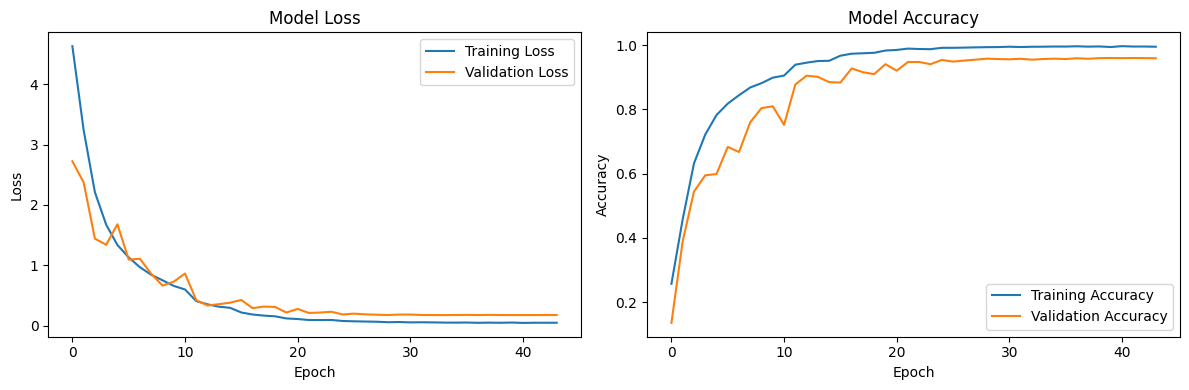

In [18]:
# Eƒüitim sonu√ßlarƒ±nƒ± g√∂rselle≈ütirir
plt.figure(figsize=(12, 4))

# Loss grafiƒüi
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiƒüi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 17. Test Veri Seti √úzerinde Model Deƒüerlendirmesi

Modelin daha √∂nce g√∂rmediƒüi veriler √ºzerindeki ger√ßek performansƒ±nƒ± √∂l√ß√ºl√ºyor.

### üîπ Deƒüerlendirme Parametreleri
- **Veri Seti**: `test_dataset` (eƒüitim sƒ±rasƒ±nda kullanƒ±lmayan veriler)
- **Verbose**: 1 (ilerleme √ßubuƒüu g√∂sterimi aktif)
- **√áƒ±ktƒ± Formatƒ±**: 4 ondalƒ±k basamak 

### üîπ √ñl√ß√ºlen Metrikler
1. **Test Loss (Kayƒ±p)**
   - Model tahminlerinin ger√ßek deƒüerlerden sapma miktarƒ±

2. **Test Accuracy (Doƒüruluk)**
   - Doƒüru tahmin edilen √∂rneklerin y√ºzdesi
   - 0 ile 1 arasƒ±nda bir deƒüer (1 = %100 doƒüruluk)

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 44ms/step - accuracy: 0.9546 - loss: 0.1604

Test accuracy: 0.9487
Test loss: 0.1705


# 18. Karma≈üƒ±klƒ±k Matrisi

Olu≈üturulan modelin her Simpson karakteri i√ßin tahmin performansƒ±nƒ± detaylƒ± olarak analiz etmek i√ßin karma≈üƒ±klƒ±k matrisi (confusion matrix) olu≈üturuyor ve g√∂rselle≈ütiriyoruz.

### üîπ Veri Hazƒ±rlƒ±ƒüƒ±
- Test veri seti √ºzerinde batch'ler halinde tahminler yapƒ±lƒ±yor
- Tahminler ve ger√ßek etiketler NumPy dizilerine d√∂n√º≈üt√ºr√ºl√ºyor
- Softmax √ßƒ±ktƒ±larƒ± en y√ºksek olasƒ±lƒ±klƒ± sƒ±nƒ±fa d√∂n√º≈üt√ºr√ºl√ºyor

### üîπ Matrix'in Analiz Edilmesi
- K√∂≈üegen deƒüerler: Doƒüru Sƒ±nƒ±flandƒ±rmalar
- K√∂≈üegen dƒ±≈üƒ± deƒüerler: Yanlƒ±≈ü Sƒ±nƒ±flandƒ±rmalar
- Koyu renkli h√ºcreler: Y√ºksek frekans
- A√ßƒ±k renkli h√ºcreler: D√º≈ü√ºk frekans

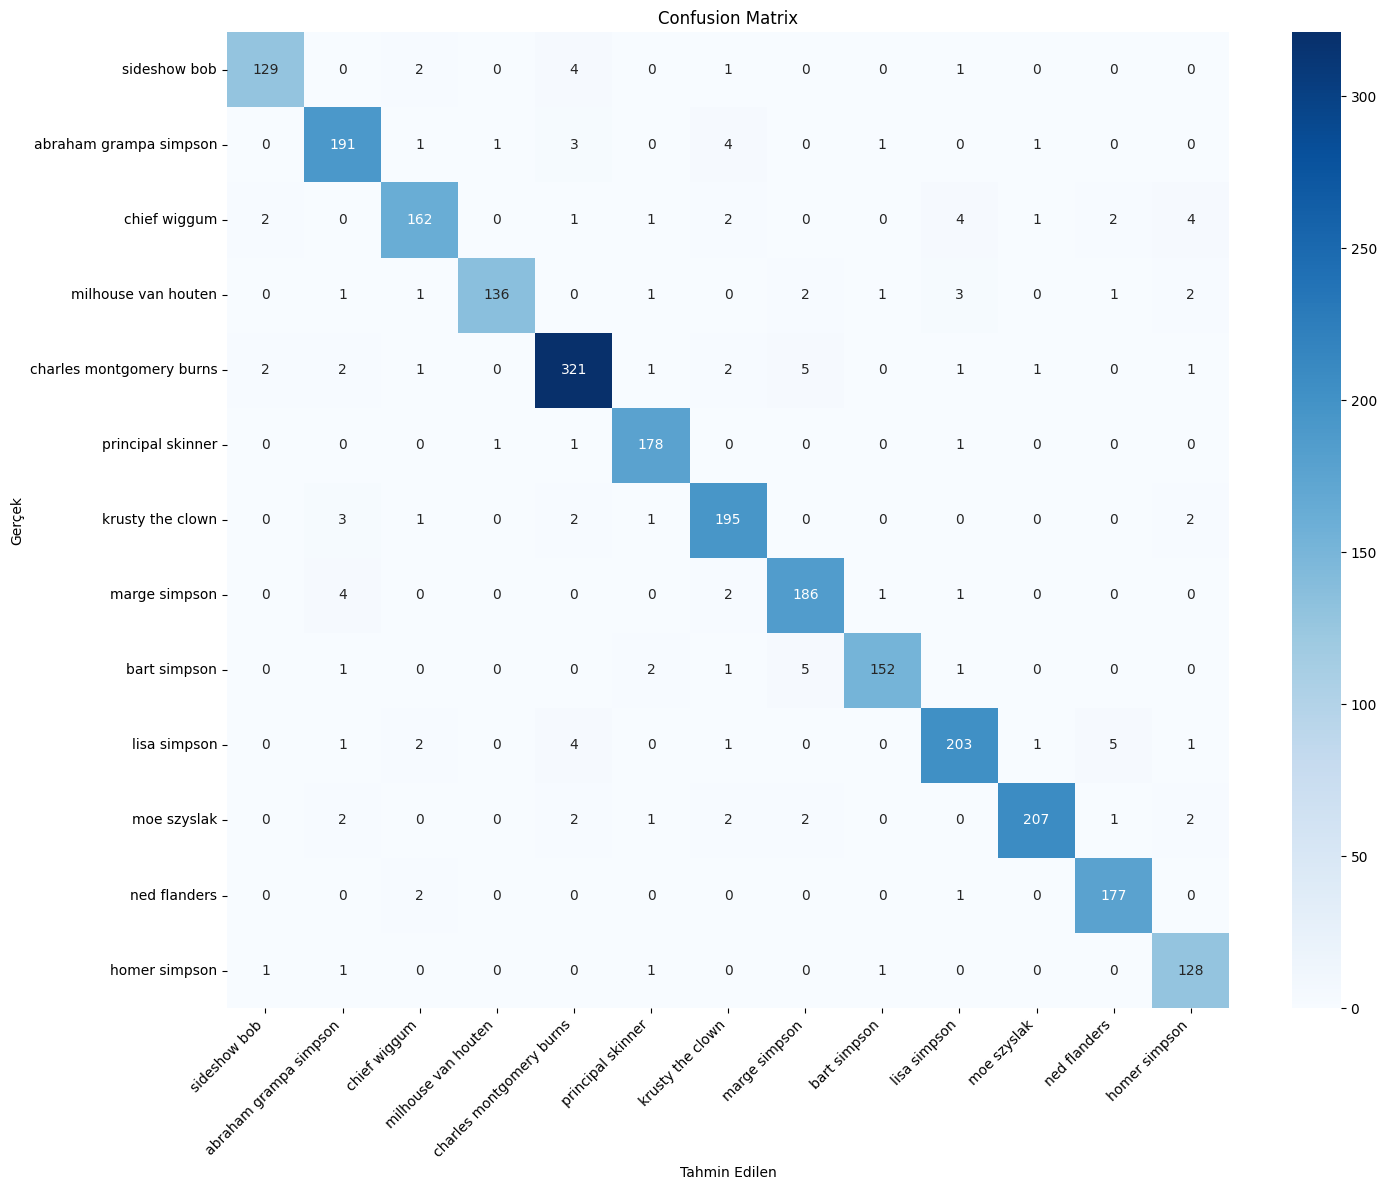

In [20]:
y_true = []
y_pred = []

for batch_images, batch_labels in test_dataset:
    batch_predictions = model.predict(batch_images, verbose=0)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)

    y_true.extend(batch_labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

plt.figure(figsize=(15, 12))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[name.replace('_', ' ') for name in allowed_classes],
            yticklabels=[name.replace('_', ' ') for name in allowed_classes])

plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Ger√ßek')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 19. Detaylƒ± Performans Analizi

Olu≈üturulan modelin her Simpson karakteri i√ßin precision, recall ve f1-score metriklerini hesaplanƒ±yor ve g√∂rselle≈ütiriliyor.

In [21]:
print("\nDetaylƒ± Performans Raporu:")
print(classification_report(
    y_true,
    y_pred,
    target_names=[name.replace('_', ' ') for name in allowed_classes],
    digits=4
))


Detaylƒ± Performans Raporu:
                          precision    recall  f1-score   support

            sideshow bob     0.9627    0.9416    0.9520       137
  abraham grampa simpson     0.9272    0.9455    0.9363       202
            chief wiggum     0.9419    0.9050    0.9231       179
     milhouse van houten     0.9855    0.9189    0.9510       148
charles montgomery burns     0.9497    0.9525    0.9511       337
       principal skinner     0.9570    0.9834    0.9700       181
        krusty the clown     0.9286    0.9559    0.9420       204
           marge simpson     0.9300    0.9588    0.9442       194
            bart simpson     0.9744    0.9383    0.9560       162
            lisa simpson     0.9398    0.9312    0.9355       218
             moe szyslak     0.9810    0.9452    0.9628       219
            ned flanders     0.9516    0.9833    0.9672       180
           homer simpson     0.9143    0.9697    0.9412       132

                accuracy                     

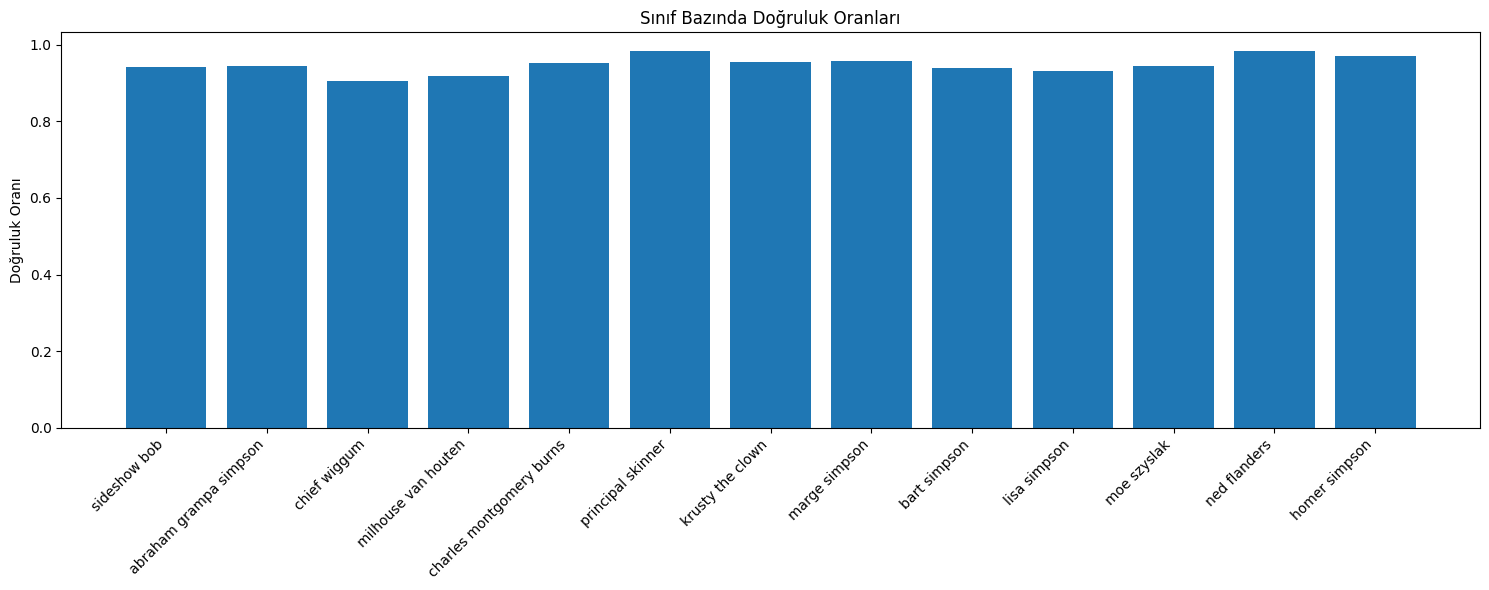

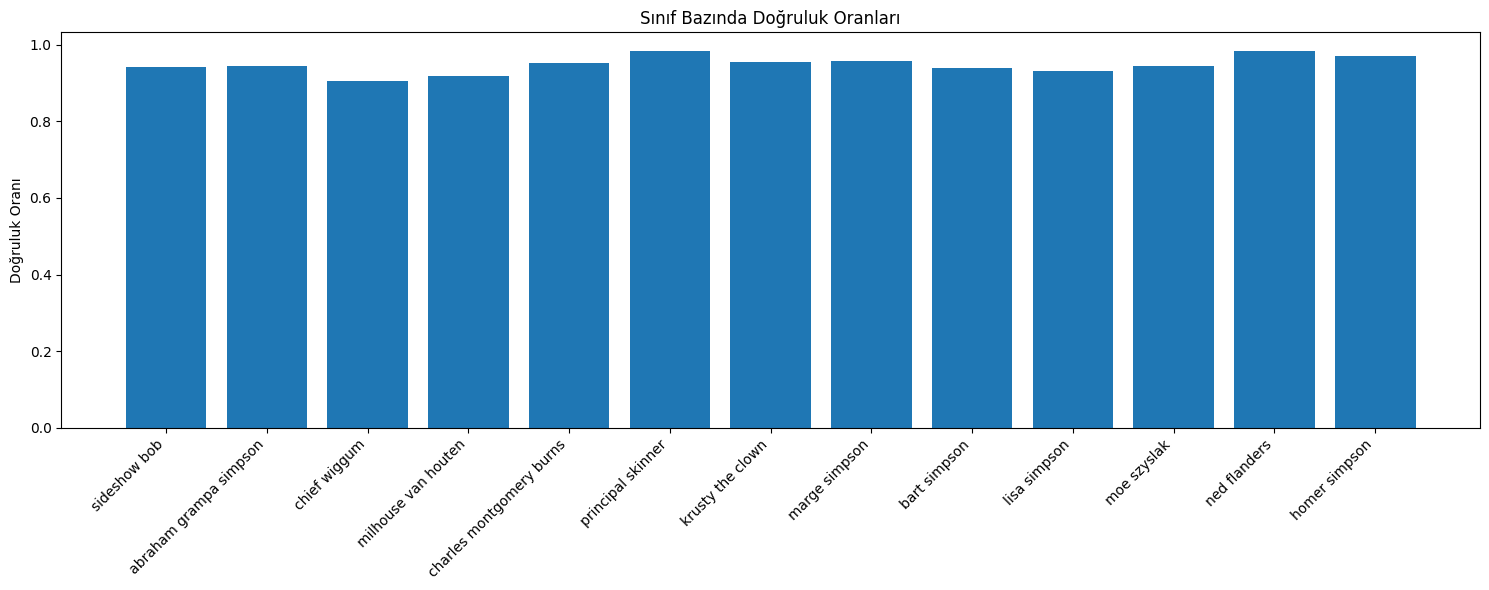

In [22]:
class_accuracies = {}
for i, class_name in enumerate(allowed_classes):
    class_mask = (y_true == i)
    class_accuracy = np.mean(y_pred[class_mask] == i)
    class_accuracies[class_name] = class_accuracyclass_accuracies = {}
for i, class_name in enumerate(allowed_classes):
    class_mask = (y_true == i)
    class_accuracy = np.mean(y_pred[class_mask] == i)
    class_accuracies[class_name] = class_accuracy

plt.figure(figsize=(15, 6))
plt.bar(
    [name.replace('_', ' ') for name in allowed_classes],
    [class_accuracies[name] for name in allowed_classes]
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Doƒüruluk Oranƒ±')
plt.title('Sƒ±nƒ±f Bazƒ±nda Doƒüruluk Oranlarƒ±')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(
    [name.replace('_', ' ') for name in allowed_classes],
    [class_accuracies[name] for name in allowed_classes]
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Doƒüruluk Oranƒ±')
plt.title('Sƒ±nƒ±f Bazƒ±nda Doƒüruluk Oranlarƒ±')
plt.tight_layout()
plt.show()

In [23]:
print("\nSƒ±nƒ±f Bazƒ±nda Doƒüruluk Oranlarƒ±:")
for class_name in allowed_classes:
    print(f"{class_name.replace('_', ' ')}: {class_accuracies[class_name]:.4f}")


Sƒ±nƒ±f Bazƒ±nda Doƒüruluk Oranlarƒ±:
sideshow bob: 0.9416
abraham grampa simpson: 0.9455
chief wiggum: 0.9050
milhouse van houten: 0.9189
charles montgomery burns: 0.9525
principal skinner: 0.9834
krusty the clown: 0.9559
marge simpson: 0.9588
bart simpson: 0.9383
lisa simpson: 0.9312
moe szyslak: 0.9452
ned flanders: 0.9833
homer simpson: 0.9697
